In [ ]:
# a - IYER
# b - 03/19/2020
# c - We will do an EDA to begin with to check for outliers and imbalances in the data and post confirming our final
#data after encoding categorical to numerical variables; Will run multiple classification algorithms to check for AUC
#and accuracy scores in order to compare them & choose the model with the best AUC score to predict the test data.
#d The estimated AUC on the test data that I expect will be 0.85(approx.)

In [31]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [32]:
#Importing the data
data = pd.read_csv(r'/Users/venkateshiyersubramanian/Documents/data/train.csv', index_col=False)

In [33]:
#Initial data view
data.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0


In [34]:
#Converting in to a dataframe & inital analysis of missing values, we see that only Gender has missing values
df = pd.DataFrame(data)
len(df) - df.count()

age                             0
cost_of_ad                      0
device_type                     0
gender                        269
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
outcome                         0
dtype: int64

In [35]:
#Checking unique values for device_type
print(df.device_type.unique())
print(df.gender.unique())

['iPhone' 'desktop' 'laptop' 'Android' 'other']
['M' 'F' nan]


In [36]:
# replacing nan values in gender with NA
df['gender'] = df['gender'].replace(np.nan, 'NA')

In [37]:
print(df.gender.unique())

['M' 'F' 'NA']


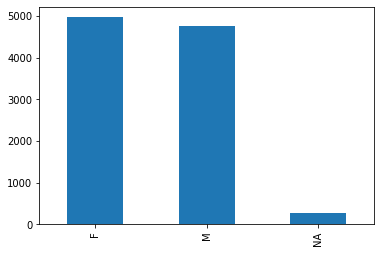

In [38]:
#Checking for gender counts balance, we can see that the no.of females are marginally higher than the male
dfg = df
dfg = df['gender'].value_counts().plot(kind='bar')

0    9018
1     982
Name: outcome, dtype: int64


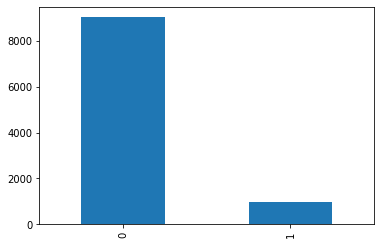

In [39]:
#Checking the outcome variable distribution, we can clearly see that the '0's' are almost 90% in number
dfo = df
dfo = df['outcome'].value_counts().plot(kind='bar')
print(df['outcome'].value_counts())

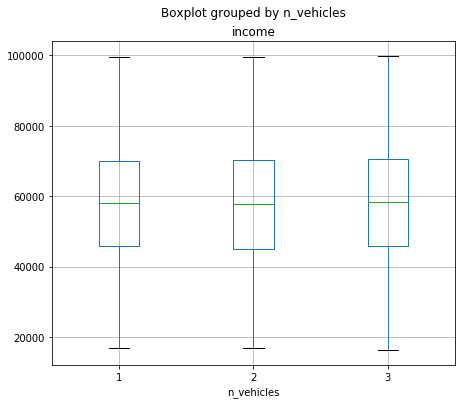

In [40]:
df.boxplot('income', 'n_vehicles', figsize=(7,6))

10000


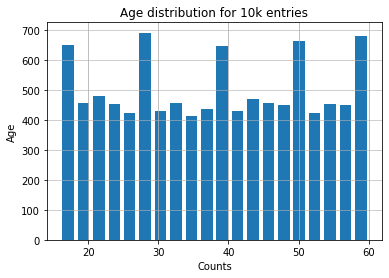

In [41]:
#Checking the distribution of ages on a histogram; we do see that there are around 450 people 
#whose age is below the age of 18, We also notice that the maximum no.of people around the age of 28-29 and 58-59
df_age = data['age']
df_age.hist(bins=20, rwidth=0.75)
print(len(df_age))
plt.title('Age distribution for 10k entries')
plt.xlabel('Counts')
plt.ylabel('Age')
plt.grid(axis='y', alpha=0.75)

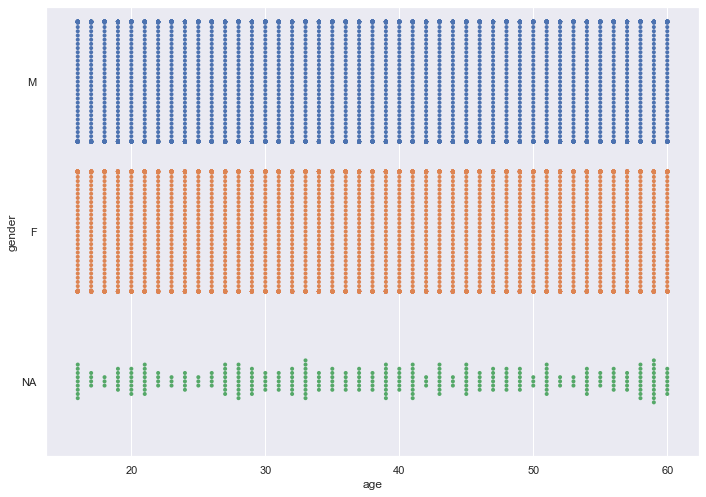

In [25]:
#Comparing the age distrubution across genders, looks fairly distributed 
sns.set(rc={'figure.figsize':(11.7,8.27)})
agebplot = sns.swarmplot(x='age'
                         , y='gender', data=data, size = 4)

In [42]:
#Converting gender variable to numerical
dffinal_g = data.copy()
dffinal_g = pd.get_dummies(dffinal_g, columns=['gender'], prefix = ['gen'])
print(dffinal_g.head())

   age  cost_of_ad device_type  in_initial_launch_location  income  n_drivers  \
0   56    0.005737      iPhone                           0   62717          2   
1   50    0.004733     desktop                           0   64328          2   
2   54    0.004129      laptop                           0   83439          1   
3   16    0.005117     Android                           0   30110          2   
4   37    0.003635     desktop                           0   76565          2   

   n_vehicles  prior_ins_tenure  outcome  gen_F  gen_M  gen_NA  
0           1                 4        0      0      1       0  
1           3                 2        0      1      0       0  
2           3                 7        0      0      1       0  
3           3                 0        0      1      0       0  
4           1                 5        0      0      1       0  


In [43]:
#Converting device_type in to numerical
dffinal_dt = dffinal_g.copy()
dffinal_dt = pd.get_dummies(dffinal_dt, columns=['device_type'], prefix =['dt'])
print(dffinal_dt.head())                            

   age  cost_of_ad  in_initial_launch_location  income  n_drivers  n_vehicles  \
0   56    0.005737                           0   62717          2           1   
1   50    0.004733                           0   64328          2           3   
2   54    0.004129                           0   83439          1           3   
3   16    0.005117                           0   30110          2           3   
4   37    0.003635                           0   76565          2           1   

   prior_ins_tenure  outcome  gen_F  gen_M  gen_NA  dt_Android  dt_desktop  \
0                 4        0      0      1       0           0           0   
1                 2        0      1      0       0           0           1   
2                 7        0      0      1       0           0           0   
3                 0        0      1      0       0           1           0   
4                 5        0      0      1       0           0           1   

   dt_iPhone  dt_laptop  dt_other  
0       

In [44]:
temp = dffinal_dt[(dffinal_dt.outcome == 1)]
temp.shape
df_final = dffinal_dt.copy()
df_final = dffinal_dt.append(temp)

In [45]:
df_final.shape

(10982, 16)

In [46]:
#Split dataset in features and target variable
X=df_final.ix[:,(0,1,2,3,4,5,6,8,9,10,11,12,13,14,15)]
y =df_final.ix[:,(7)]

In [48]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [15]:
# We did see that the data for the outcome variable is skewed and has really high no. of zero's compared to 1's
#So we balanced out the data as below:

In [50]:
import random
# Balancing the Training Set
y_train.value_counts()

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(8)
higher = np.random.choice(higher, size= 2*len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [52]:
#Logistic Regression Model Fitting
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
logreg = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='multinomial').fit(X, y)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_pred = logreg.predict(X_test)

In [54]:
#The support is the number of occurrences of each class in y_test.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1792
           1       0.00      0.00      0.00       405

    accuracy                           0.82      2197
   macro avg       0.41      0.50      0.45      2197
weighted avg       0.67      0.82      0.73      2197



In [55]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [56]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_lr = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC:LR {}".format(roc_auc_score(y_test, y_pred_prob_lr)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC:LR 0.5172591490299824
AUC scores computed using 5-fold cross-validation: [0.49095874 0.49541308 0.48564823 0.49785416 0.50608962]


In [57]:
#Linear SVM Model Fitting:
from sklearn.svm import SVC
svclassifier = SVC(random_state=0, kernel='rbf', probability=True)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1792
           1       0.96      0.80      0.88       405

    accuracy                           0.96      2197
   macro avg       0.96      0.90      0.93      2197
weighted avg       0.96      0.96      0.96      2197



In [59]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_svm = svclassifier.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC:SVM {}".format(roc_auc_score(y_test, y_pred_prob_svm)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(svclassifier, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC:SVM 0.9036320546737213
AUC scores computed using 5-fold cross-validation: [0.99818611 0.99965584 0.99708733 0.99822885 0.99900534]


In [60]:
from sklearn.tree import DecisionTreeClassifier 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=20)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1792
           1       0.54      0.92      0.68       405

    accuracy                           0.84      2197
   macro avg       0.76      0.87      0.79      2197
weighted avg       0.90      0.84      0.85      2197



In [62]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_clf = clf.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC:DT {}".format(roc_auc_score(y_test, y_pred_prob_clf)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC:DT 0.8724667934303352
AUC scores computed using 5-fold cross-validation: [0.96050549 0.95332326 0.953544   0.95605924 0.95173789]


In [63]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
crf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
crf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1792
           1       0.54      0.92      0.68       405

    accuracy                           0.84      2197
   macro avg       0.76      0.87      0.79      2197
weighted avg       0.90      0.84      0.85      2197



In [66]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_crf = crf.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC:RF {}".format(roc_auc_score(y_test, y_pred_prob_crf)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(crf, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC:RF 0.952018573633157
AUC scores computed using 5-fold cross-validation: [0.99527344 0.99406041 0.99490742 0.99489895 0.99391887]


In [67]:
#GBM algorithm  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.metrics import mean_squared_error
xgb = GradientBoostingClassifier()
from sklearn.metrics import recall_score
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1792
           1       0.45      0.74      0.56       405

    accuracy                           0.79      2197
   macro avg       0.69      0.77      0.71      2197
weighted avg       0.84      0.79      0.81      2197



In [70]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_xgb = xgb.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC:GB {}".format(roc_auc_score(y_test, y_pred_prob_xgb)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(xgb, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC:GB 0.8576009975749559
AUC scores computed using 5-fold cross-validation: [0.8761961  0.86218144 0.87824907 0.87799032 0.86776362]


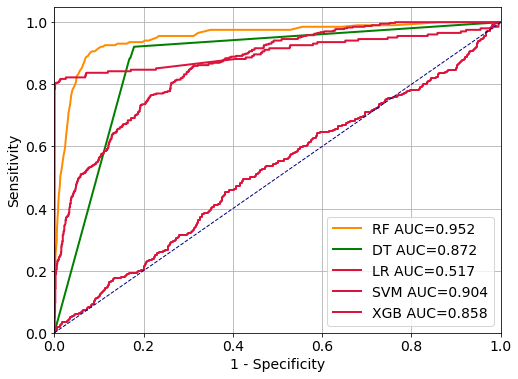

In [73]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc


plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.grid()
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_pred_prob_crf)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='RF AUC={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_pred_prob_clf)
plt.plot(fpr, tpr, color='green', lw=2,
         label='DT AUC={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_pred_prob_lr)
plt.plot(fpr, tpr, color='crimson', lw=2,
         label='LR AUC={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_pred_prob_svm)
plt.plot(fpr, tpr, color='crimson', lw=2,
         label='SVM AUC={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_pred_prob_xgb)
plt.plot(fpr, tpr, color='crimson', lw=2,
         label='XGB AUC={0:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()
#We can see that the top two models with the highest AUC are Random Forest followed by SVM

In [75]:
#Reading in the Test set
#Importing the data
data_test = pd.read_csv(r'/Users/venkateshiyersubramanian/Documents/data/test.csv', index_col=False)

In [76]:
data_test.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,34,0.005134,Android,F,1,40376,1,3,7
1,53,0.005223,desktop,F,1,84511,1,1,11
2,46,0.004939,laptop,F,0,79322,1,1,4
3,36,0.004924,Android,F,0,63295,1,2,0
4,28,0.005146,other,F,1,36170,1,3,3


In [84]:
# replacing nan values in gender with NA
data_test['gender'] = data_test['gender'].replace(np.nan, 'NA')

In [85]:
#Converting gender variable to numerical
data_final = data_test.copy()
data_final = pd.get_dummies(data_final, columns=['gender'], prefix = ['gen'])
print(data_final.head())

   age  cost_of_ad device_type  in_initial_launch_location  income  n_drivers  \
0   34    0.005134     Android                           1   40376          1   
1   53    0.005223     desktop                           1   84511          1   
2   46    0.004939      laptop                           0   79322          1   
3   36    0.004924     Android                           0   63295          1   
4   28    0.005146       other                           1   36170          1   

   n_vehicles  prior_ins_tenure  gen_F  gen_M  gen_NA  
0           3                 7      1      0       0  
1           1                11      1      0       0  
2           1                 4      1      0       0  
3           2                 0      1      0       0  
4           3                 3      1      0       0  


In [86]:
#Converting device_type in to numerical
data_final = data_final.copy()
data_final = pd.get_dummies(data_final, columns=['device_type'], prefix =['dt'])
print(data_final.head()) 

   age  cost_of_ad  in_initial_launch_location  income  n_drivers  n_vehicles  \
0   34    0.005134                           1   40376          1           3   
1   53    0.005223                           1   84511          1           1   
2   46    0.004939                           0   79322          1           1   
3   36    0.004924                           0   63295          1           2   
4   28    0.005146                           1   36170          1           3   

   prior_ins_tenure  gen_F  gen_M  gen_NA  dt_Android  dt_desktop  dt_iPhone  \
0                 7      1      0       0           1           0          0   
1                11      1      0       0           0           1          0   
2                 4      1      0       0           0           0          0   
3                 0      1      0       0           1           0          0   
4                 3      1      0       0           0           0          0   

   dt_laptop  dt_other  
0      

In [89]:
#Import Random Forest Model
#Running the best model(RF)from the training set on the test.csv file
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
crf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
crf.fit(X_train,y_train)

y_final=clf.predict(data_final)

In [93]:
data_final['Outcome'] = y_final
from IPython.display import display
pd.options.display.max_columns = None

In [94]:
data_final.head()
#Please scroll to the right to see the 'Outcome' column with first five predicted values

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,gen_F,gen_M,gen_NA,dt_Android,dt_desktop,dt_iPhone,dt_laptop,dt_other,Outcome
0,34,0.005134,1,40376,1,3,7,1,0,0,1,0,0,0,0,1
1,53,0.005223,1,84511,1,1,11,1,0,0,0,1,0,0,0,0
2,46,0.004939,0,79322,1,1,4,1,0,0,0,0,0,1,0,0
3,36,0.004924,0,63295,1,2,0,1,0,0,1,0,0,0,0,0
4,28,0.005146,1,36170,1,3,3,1,0,0,0,0,0,0,1,0
